In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.read_csv(r"C:\Users\ELIAS\Desktop\Oasis infobyte\Dataset\Housing.csv")
df=pd.read_csv(r"C:\Users\ELIAS\Desktop\Oasis infobyte\Dataset\Housing.csv")

## Dataset Info:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
#check for null values
null_values=df.isnull().sum().sum()
if null_values == 0:
    print ("No Null values")
else:
    print(f"There is {null_values} null values")

No Null values


In [4]:
df.shape

(545, 13)

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.nunique

<bound method DataFrame.nunique of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no      

In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<Axes: ylabel='parking'>

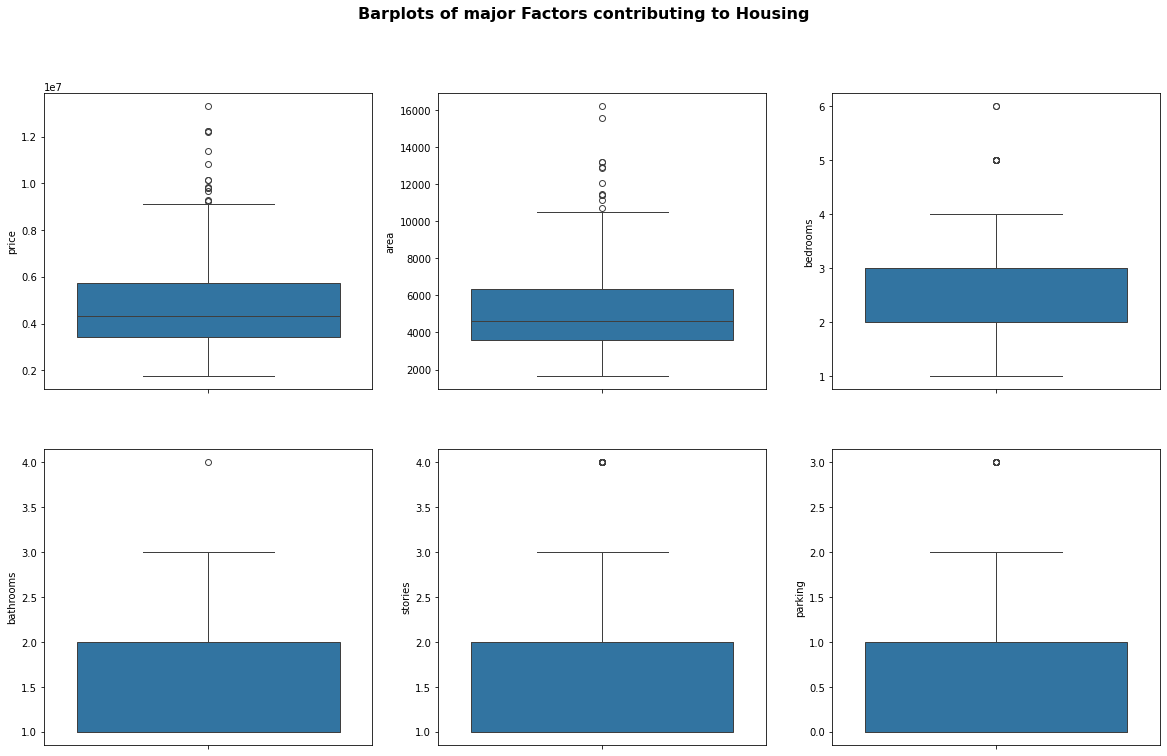

In [8]:

#Outliers for factors
figs, axes= plt.subplots(2,3, figsize=(20,12))
plt.suptitle('Barplots of major Factors contributing to Housing', fontsize=16, fontweight='bold')

sns.boxplot(df['price'], ax=axes[0,0])
sns.boxplot(df['area'], ax=axes[0,1])
sns.boxplot(df['bedrooms'], ax=axes[0,2])
sns.boxplot(df['bathrooms'], ax=axes[1,0])
sns.boxplot(df['stories'], ax=axes[1,1])
sns.boxplot(df['parking'], ax=axes[1,2])

## Outlier Treatment (Price, Area)

In [9]:
#outlier for Area( upper bound, lower bound)
Q1=df['area']. quantile(0.25)
Q3=df['area']. quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

housing=df[(df['area']<lower_bound)| (df['area']>upper_bound)]
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished


{'whiskers': [<matplotlib.lines.Line2D at 0x1f9d1674430>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9d1674970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9d1674190>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9d1674eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9d1683190>],
 'means': []}

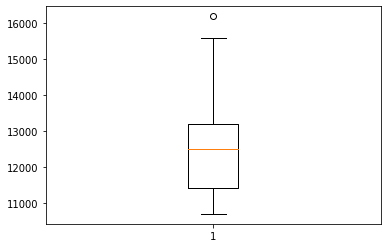

In [10]:
plt.boxplot(housing.area)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9d16d9f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9d16ea4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9d16d9dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9d16eaa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9d16eaca0>],
 'means': []}

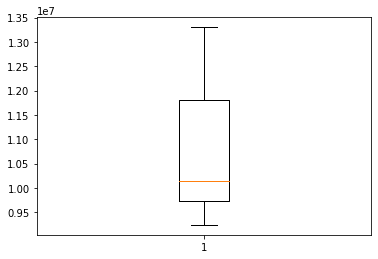

In [11]:
#outlier for Price( upper bound, lower bound)
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1-1.5* IQR
upper_bound=Q3+1.5* IQR
housing= df[(df['price']< lower_bound) | (df['price']> upper_bound)]
plt.boxplot(housing.price)

<Axes: ylabel='parking'>

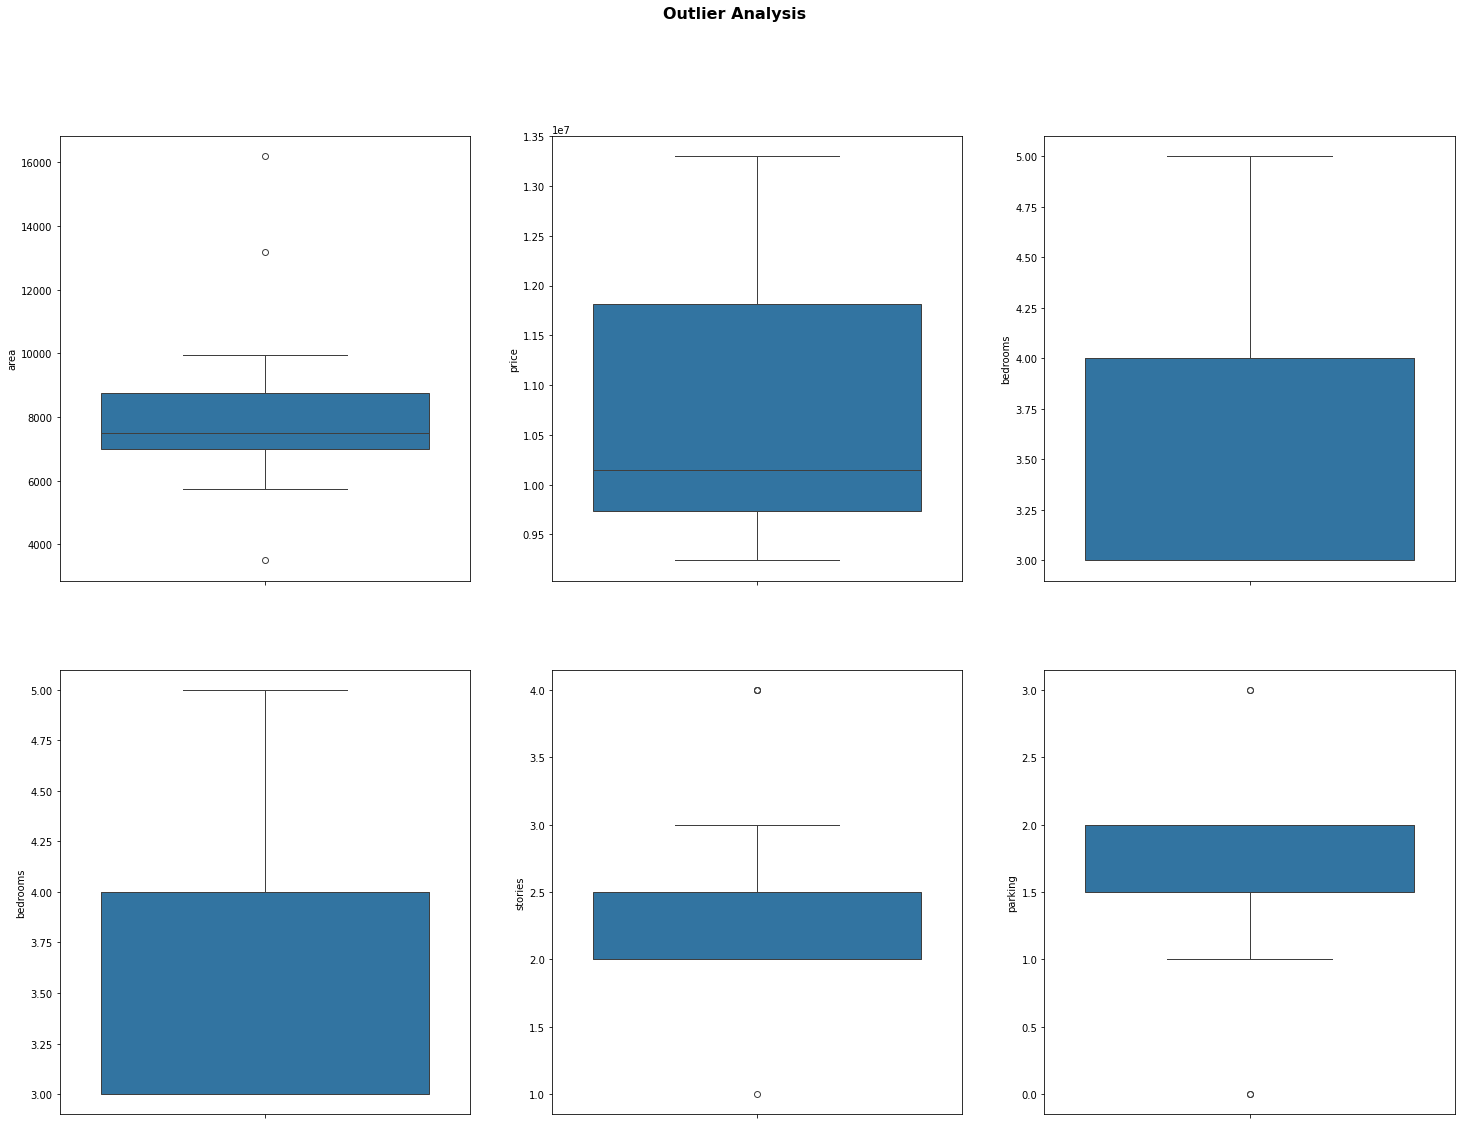

In [12]:
#Outlier Analysis
fig,axes= plt.subplots(2,3, figsize=(25,18))
plt.suptitle('Outlier Analysis', fontsize=16, fontweight='bold')

sns.boxplot(housing['area'], ax=axes[0,0])
sns.boxplot(housing['price'], ax=axes[0,1])
sns.boxplot(housing['bedrooms'], ax=axes[0,2])
sns.boxplot(housing['bedrooms'], ax=axes[1,0])
sns.boxplot(housing['stories'], ax=axes[1,1])
sns.boxplot(housing['parking'], ax=axes[1,2])

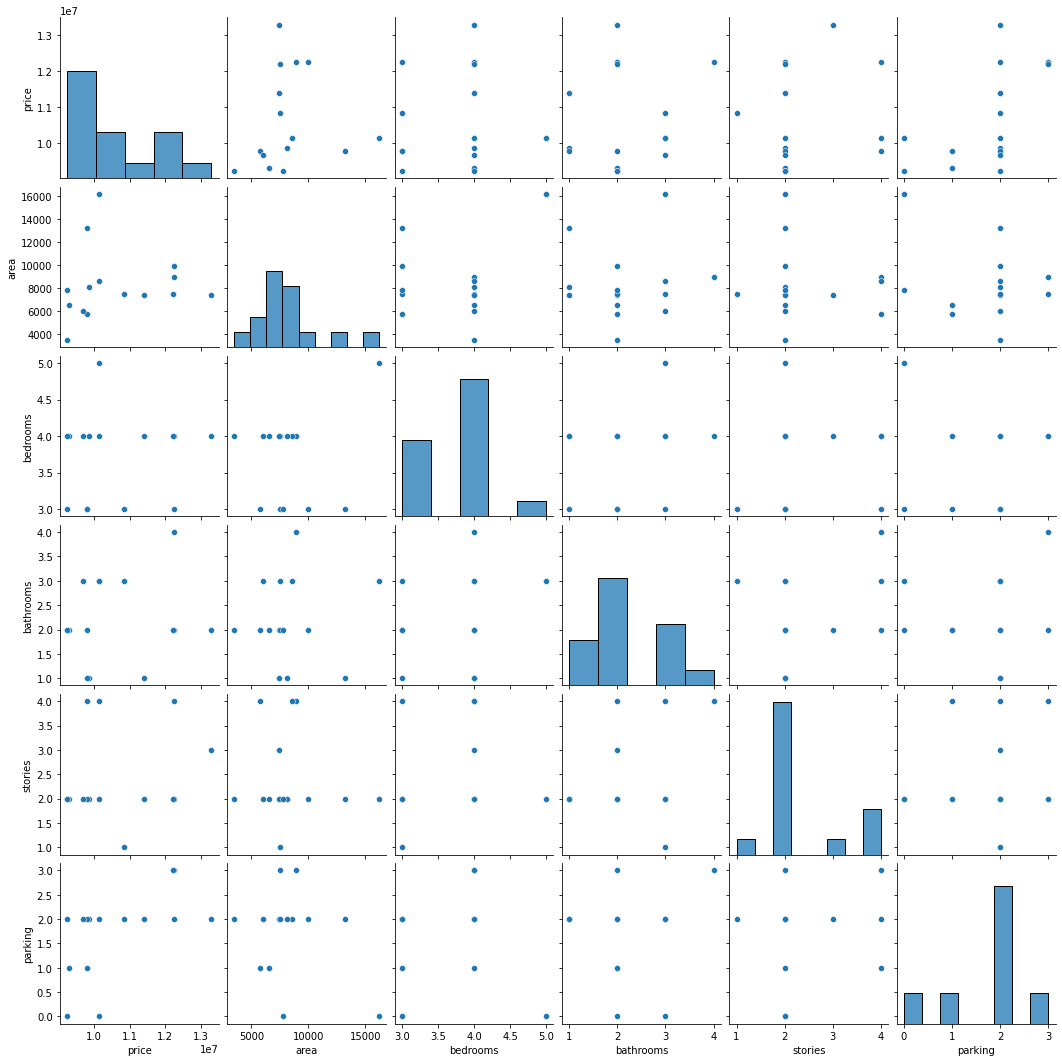

In [13]:
sns.pairplot(housing)
plt.show()

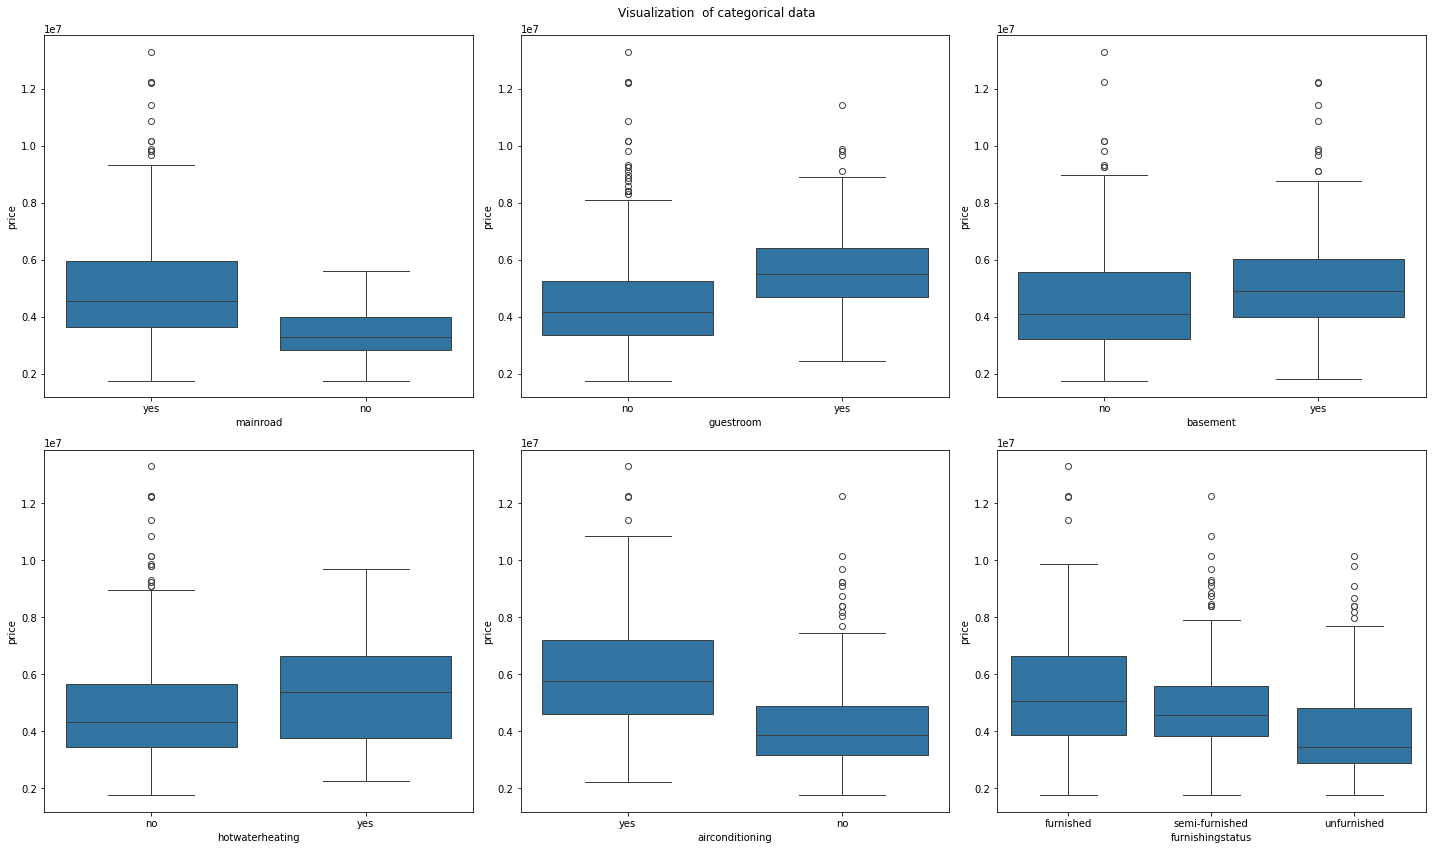

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
plt.suptitle('Visualization  of categorical data')
sns.boxplot(data=df, x='mainroad', y='price')
plt.subplot(2,3,2)
sns.boxplot(data=df, y='price', x='guestroom')
plt.subplot(2,3,3)
sns.boxplot(data=df, x='basement', y='price')
plt.subplot(2,3,4)
sns.boxplot(data=df, x='hotwaterheating', y='price')
plt.subplot(2,3,5)
sns.boxplot(data=df, x='airconditioning', y='price')
plt.subplot(2,3,6)
sns.boxplot(data=df, x='furnishingstatus', y='price')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

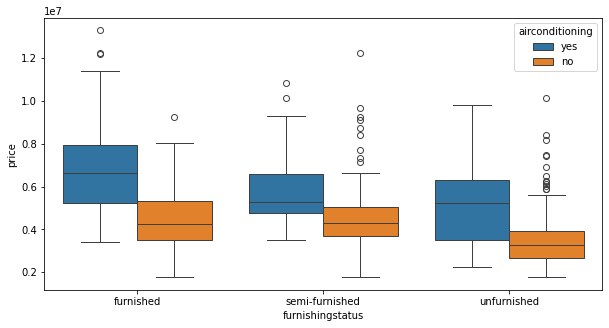

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='furnishingstatus', y='price', hue='airconditioning')
plt.show

In [16]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_1 = df[varlist].replace({'yes': 1, 'no': 0})
df_1.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [17]:
#Create a dummy
status=pd.get_dummies(housing['furnishingstatus'], drop_first = True).astype(int)
status.tail()

,semi-furnished,unfurnished
10,0,0
11,1,0
12,1,0
13,0,0
14,1,0


In [18]:
status.info

<bound method DataFrame.info of     semi-furnished  unfurnished
0                0            0
1                0            0
2                1            0
3                0            0
4                0            0
5                1            0
6                1            0
7                0            1
8                0            0
9                0            1
10               0            0
11               1            0
12               1            0
13               0            0
14               1            0>

In [19]:
housing = pd.concat([df_1, status], axis = 1)

In [20]:
#Training and T-tests
from sklearn.model_selection import train_test_split
#Ensure equal number of rows and columns
import numpy as np
np.random.seed(0)
df_train, df_test=train_test_split(df, train_size= 0.7, random_state=100)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
#apply scaler to numerical col
num_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_train=df_train.replace({'yes': 1, 'no':0})
df_test=df_train.replace({'yes': 1, 'no':0})
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,unfurnished
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,semi-furnished
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,furnished
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,furnished
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,unfurnished


In [22]:
df_train['furnishingstatus'] = df_train['furnishingstatus'].map({
    'furnished': 1,
    'unfurnished': 0
}).fillna(0)

In [23]:
df_train.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0.0
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0.0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,0.0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,1.0
520,0.060606,0.516015,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0.0


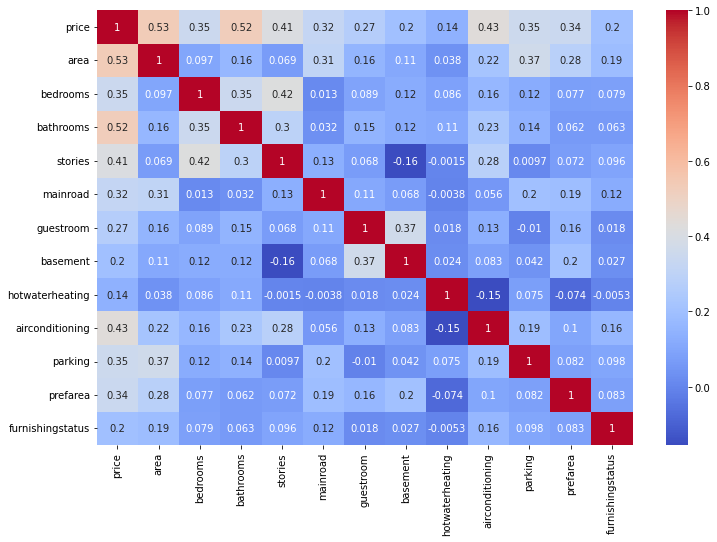

In [24]:
#Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(data=df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
#Dividing model into two Sections
X_train=df_train
y_train=df_train.pop('price')

In [26]:
#RFE( Recursive Features Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X_train = pd.get_dummies(X_train, drop_first=True)
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [28]:
X_train= X_train.astype(int)

In [29]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,0,0,0,0,1,0,0,0,0,0,0,0
19,0,0,0,0,1,0,0,0,1,0,1,0
159,0,0,0,0,1,1,1,0,1,0,0,1
35,0,0,0,1,1,0,0,0,1,0,0,1
28,0,0,0,0,1,0,1,1,0,0,0,0


In [30]:
import statsmodels.api as sm 
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe=rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 3),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 2),
 ('guestroom', False, 4),
 ('basement', False, 5),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 7),
 ('prefarea', True, 1),
 ('furnishingstatus', False, 6)]

In [32]:
#Call the column
col=X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

## Building model using statsmodel

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
import statsmodels.api as sm 
X_train_rfe = sm.add_constant(X_train_rfe)  

In [35]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [36]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     47.01
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           7.57e-43
Time:                        09:03:19   Log-Likelihood:                 270.90
No. Observations:                 381   AIC:                            -527.8
Df Residuals:                     374   BIC:                            -500.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1716      0.008     

In [37]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,1.83
5,airconditioning,1.14
3,stories,1.11
4,hotwaterheating,1.06
1,area,1.03
6,prefarea,1.02
2,bathrooms,1.01


## Residual Analysis

In [39]:
#Check error
y_train_price=lm.predict(X_train_rfe)

In [40]:
res=(y_train_price - y_train)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

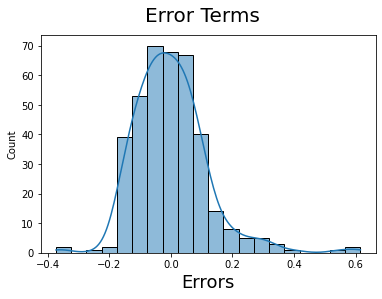

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price),kde=True, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)         

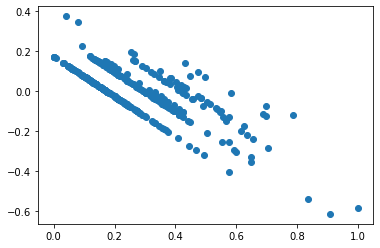

In [43]:
plt.scatter(y_train,res)
plt.show()

## Model Evaluation

In [66]:
df_test=pd.concat([df_test, df['price']], axis=1).dropna().replace({'yes':1, 'no':0, 'unfurnished':0, 'semi-furnished':0, 'furnished':1})

In [67]:
df_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
265,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,0,4403000
54,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,0,7350000
171,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,0,5250000
244,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,0,4550000
268,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,0,4382000


In [68]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [69]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [70]:
y_test = df_test.pop('price')
X_test = df_test

In [71]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [72]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [74]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [75]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.38979164198064253

Text(0, 0.5, 'y_pred')

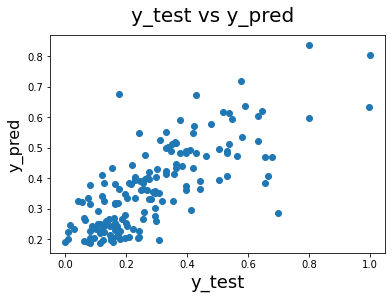

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)           